# AT1 Example II: Regression Problem

## Use the AI techniques from Lab 4

### Loading the California Housing dataset from the scikit-learn library 

In [360]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [361]:
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


### Print details of the California Housing dataset

In [362]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

#### Forming the training dataset, test dataset and futureSample set

#### Create training and test datasets

In [363]:
# Import train_test_split
from sklearn.model_selection import train_test_split

In [364]:
# Assign features to X and target variables to y
X = housing.data
y = housing.target

# Create training and test sets, 80 per cent for training and 20 per cent for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Separate the last two samples in the test dataset and store them in futureSample_X and futureSample_y, and update both X_test and y_test to remove them. This is typically used for future sample prediction and validation of the model, or to avoid using the same data in training and testing.

In [365]:
# Extract the last two samples
futureSample_X = X_test[-2:]
futureSample_y = y_test[-2:]

# Remove these two samples from the test dataset
X_test = X_test[:-2]
y_test = y_test[:-2]

### 探索训练和测试数据集

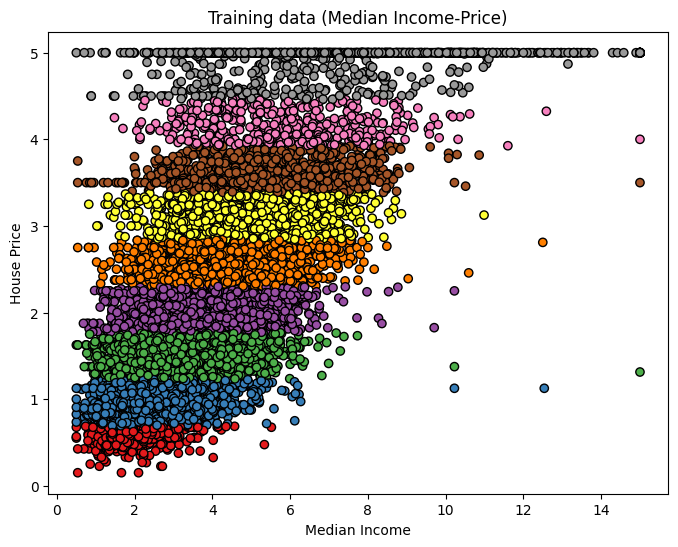

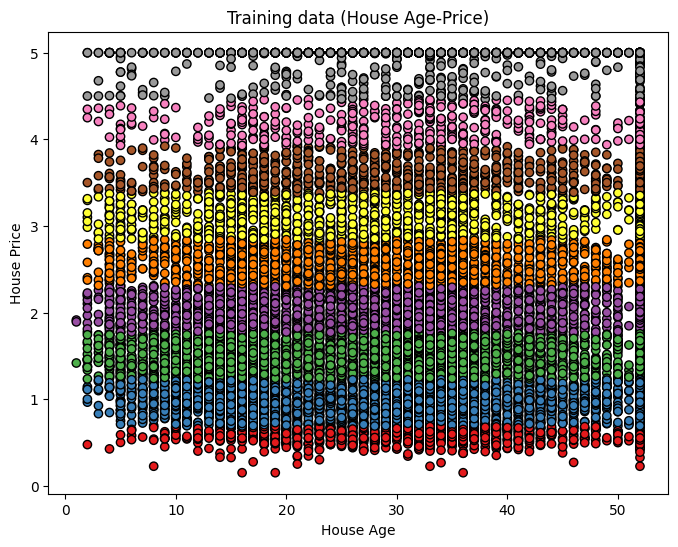

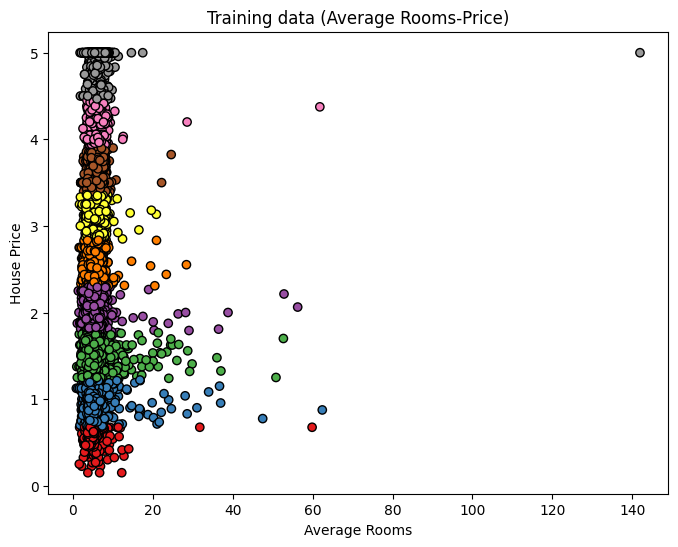

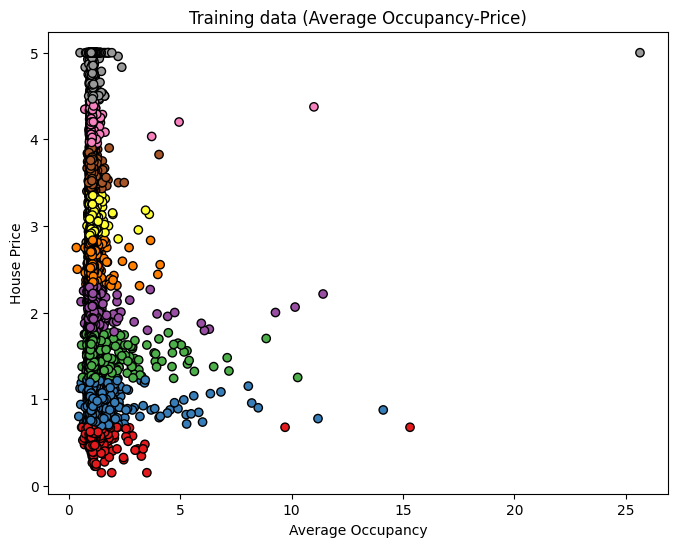

In [366]:
import matplotlib.pyplot as plt

# California Housing dataset feature names
features = ["MedInc", "HouseAge", "AveRooms", "AveOccup"]
feature_names = ["Median Income", "House Age", "Average Rooms", "Average Occupancy"]

# Iterate over each feature and plot the relationship to house prices
for i in range(len(features)):
    plt.figure(i + 1, figsize=(8, 6))  # Create a new graphic, set graphic dimensions
    plt.clf()  # Clear the current drawing to avoid duplicate drawings
    plt.scatter(X_train[:, i], y_train, c=y_train, cmap=plt.cm.Set1, edgecolor="k")
    # plot scatterplot, x_train[:, i] denotes the ith feature, y_train denotes the target variable
    # c=y_train: colour to represent the value of the target variable
    # cmap=plt.cm.Set1: use specific colour mapping
    # edgecolor=‘k’: set the point's edge colour to black

    plt.xlabel(feature_names[i])  # Set the x-axis label to the current feature name
    plt.ylabel("House Price")  # Set y-axis labels to house prices
    plt.title(f"Training data ({feature_names[i]}-Price)")  # Set the title of the diagram
    plt.show()  # Display graphics

### Using the training dataset, the regressor is trained using the selected learning algorithm.

Model Options
* 1- Support vector regression,
* 2- Linear regression,
* 3- K Nearest Neighbours and
* 4- Decision Tree
* 5- Random Forest


In [367]:
# Solution
model_option = int(input("Choose one model from the following: 1-Support vector regression, 2- linear regression, 3- K nearest neighbours, 4-decision tree and 5-Random Forest \n your choice: "))
if (model_option == 1):
    """""
    Here the Support Vector Regression (SVR) model was chosen and the following parameters were set:
	- kernel='rbf': radial basis function is used as the kernel function.
	- C=100: larger regularisation parameter allowing for a higher complexity of the model.
	- gamma='scale': gamma values are related to the variance of the data features.
	- epsilon=0.01: in this range, predicted values are not penalised.
    """""
    # Import SVR from sklearn.svm
    from sklearn.svm import SVR
    model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.01)
    # Train this model using the training dataset (X_train, y_train).
    model.fit(X_train, y_train)
elif (model_option == 2):
    """""
    Here a linear regression model is selected and fit_intercept is True by default.
    """""
    #  Import LinearRegression from sklearn.linear_model.
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    # Train this model using the training dataset (X_train, y_train).
    model.fit(X_train, y_train)
elif (model_option == 3):
    """""
    The KNN regressor was selected and the parameters were set as follows:
	- n_neighbors=9: 9 neighbours are used for prediction.
	- weights='distance': the distance of the neighbours will affect the weights of the predicted values when predicting.
	- p=1: Manhattan distance is used.
	- algorithm='auto': automatically select the best algorithm for calculating nearest neighbours.
    """""
    # Import KNeighborsRegressor from sklearn.neighbors.
    from sklearn.neighbors import KNeighborsRegressor
    model = KNeighborsRegressor(n_neighbors=9, weights='distance', p=1, algorithm='auto')
    # Train this model using the training dataset (X_train, y_train).
    model.fit(X_train, y_train)
elif (model_option == 4):
    """""
    The decision tree regression model was selected and the following parameters were set:
	- max_depth=15: the maximum depth of the tree is 15.
	- min_samples_split=20: at least 20 samples are required to split the nodes further.
	- min_samples_leaf=5: leaf nodes contain at least 5 samples.
	- max_features='sqrt': use at most the square root of the number of features in each split.
	- random_state=42: ensure consistency of randomness.
    """""
    #  Import DecisionTreeRegressor from sklearn.tree.
    from sklearn.tree import DecisionTreeRegressor
    model = DecisionTreeRegressor(max_depth=15, min_samples_split=20, min_samples_leaf=5, max_features='sqrt', random_state=42)
    # Train this DT regressor using the training data set (X_train, y_train).
    model.fit(X_train, y_train)
elif (model_option == 5):
    """""
    The random forest regression model was chosen and the following parameters were set:
	- n_estimators=3: the forest contains 3 trees.
	- max_depth=3: the maximum depth of each tree is 3.
	- max_features=2: the maximum number of features considered for each segmentation is 2.
	- max_samples=100: the maximum number of samples per tree is 100.
	- random_state=12: randomness consistency is guaranteed.
    """""
    # Import Random forest regreesor from sklearn.ensemble.
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor(n_estimators=3, max_depth=3, max_features=2, max_samples=100, random_state=12)
    # Train this model using the training dataset (X_train, y_train).
    model.fit(X_train, y_train)
else: print("invalid option number. Try again")


### Evaluating regression models

In [368]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [369]:
# Predicted values of samples in the test dataset
y_pred = model.predict(X_test)

In [370]:
# Calculate the R square
r2_test = metrics.r2_score(y_test, y_pred)
print(r2_test)

0.34740532802839674


In [371]:
# Calculate the MAE(Mean Absolute Error)
mean_absolute_error_test = metrics.mean_absolute_error(y_test, y_pred)
print(mean_absolute_error_test)

0.7012885049696725


In [372]:
import numpy as np

# Define a function MAPE() which takes y as the true value and y_predict as the predicted value and returns the Mean Absolute Percentage Error over the test dateset. One sample's Absolute Percentage Error is calculated as: abs((y-y')*100/y)
# Use the methods mean() and abs() in numpy
def MAPE(y, y_predict):
    return np.mean(np.abs((y - y_predict) / y)) * 100

# Calculate the MAPE using the function MAPE() and y=y_test and y_predict = y_pred
mape_test = MAPE(y_test, y_pred)
print(mape_test)

46.67278167380825


In [373]:
# Calculate RMSE(Root Mean Squared Error)
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(rmse_test)

0.9247992012012727


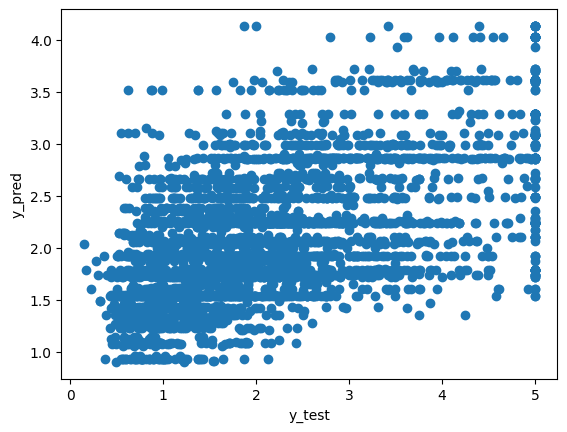

In [374]:
# Present the regression plot
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

### Predicting data sample values in a future sample set
Use futureSample_X to model new data items in a real-world application scenario. Use the method `predict()` to calculate the predicted value of the futureSample data and store it in the variable `solution_validate`.

In [375]:
# If futureSample_X and futureSample_y are not numpy arrays yet, convert them to numpy arrays
import numpy as np

if not isinstance(futureSample_X, np.ndarray):
    futureSample_X = np.array(futureSample_X)

if not isinstance(futureSample_y, np.ndarray):
    futureSample_y = np.array(futureSample_y)

# Use the model to make predictions about futureSample_X
solution_validate = model.predict(futureSample_X)

# Create a list for displaying comparisons between predicted and actual values
comparison_results = []
for i in range(len(futureSample_X)):
    comparison_results.append({
        "Sample Index": i,
        "Input Features": futureSample_X[i].tolist(),  # Convert to list for better display
        "Predicted Value": solution_validate[i],
        "Actual Value": futureSample_y[i]
    })

# Convert the results into a DataFrame for display
import pandas as pd
comparison_df = pd.DataFrame(comparison_results)

# Show comparison results
print(comparison_df)

   Sample Index                                     Input Features  \
0             0  [2.785, 36.0, 5.289029535864979, 0.98312236286...   
1             1  [3.5521, 17.0, 3.9888392857142856, 1.033482142...   

   Predicted Value  Actual Value  
0         1.733805         0.723  
1         1.733529         1.515  
